In [5]:
# custom method on birthdate
#I change all the dates and month to random dates and month but keep year same ,
#so can be use for anylatic purpose while also requcing risk of identification
import pandas as pd
import random
from datetime import datetime

# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to randomize day and month, but keep the year the same with added complexity
def randomize_day_month_complex(date_str):
    try:
        # Parse the date string (assuming DD/MM/YYYY format)
        day, month, year = date_str.split('/')
        year = int(year)
        
        # Step 1: Randomly choose a month (1 to 12)
        random_month = random.randint(1, 12)

        # Step 2: Choose the random day based on the month
        if random_month in [1, 3, 5, 7, 8, 10, 12]:
            # Months with 31 days
            random_day = random.randint(1, 31)
        elif random_month == 2:
            # February: Check if it's a leap year
            if is_leap_year(year):
                random_day = random.randint(1, 29)
            else:
                random_day = random.randint(1, 28)
        else:
            # Months with 30 days
            random_day = random.randint(1, 30)

        # Return the new randomized date in DD/MM/YYYY format
        return f"{str(random_day).zfill(2)}/{str(random_month).zfill(2)}/{year}"
    
    except Exception as e:
        print(f"Error processing date: {date_str} - {e}")
        return date_str  # Return the original date if there's an error

# Load your dataset (replace 'file_path' with your file location)
data = pd.read_csv("laboratory_blood_culture_dataset_unclean.csv")
print(data.head(1))
# Ensure the 'DOM' (Date of Birth) column is correctly formatted and not empty
if 'DOM' in data.columns:
    # Apply the randomization function to the 'DOM' column
    data['DOM'] = data['DOM'].apply(randomize_day_month_complex)
else:
    print("Error: 'DOM' column not found in dataset")

# Save the modified dataset to a new CSV
output_path = 'laboratory_blood_culture_dataset_deidentified_complex.csv'
data.to_csv(output_path, index=False)

# Load and display the first row of the modified dataset for verification
dd = pd.read_csv("laboratory_blood_culture_dataset_deidentified_complex.csv")
print(dd.head(1))



  Order Number   Stay ID      UMRN        DOM  Age at Colln  Collection Time  \
0   O513653999  66448162  U1679215  23/4/1975      46.96783  11/4/2022 14:31   

        Order Time    Received Time Interim Report Time  \
0  11/4/2022 13:16  11/4/2022 15:12     11/4/2022 19:12   

  Preliminary Report Time  ... Performing Lab BC scale Clinic Location  \
0         11/4/2022 22:12  ...            MIB       BC   West Midlands   

          Region MET y/n             Clinic Name ED source Lab at source  \
0  West Midlands       Y  West Midlands Oncology  Oncology         Bcref   

  Isolated Organisms    RESULT  
0                NaN  Negative  

[1 rows x 23 columns]
  Order Number   Stay ID      UMRN         DOM  Age at Colln  Collection Time  \
0   O513653999  66448162  U1679215  30/03/1975      46.96783  11/4/2022 14:31   

        Order Time    Received Time Interim Report Time  \
0  11/4/2022 13:16  11/4/2022 15:12     11/4/2022 19:12   

  Preliminary Report Time  ... Performing Lab B

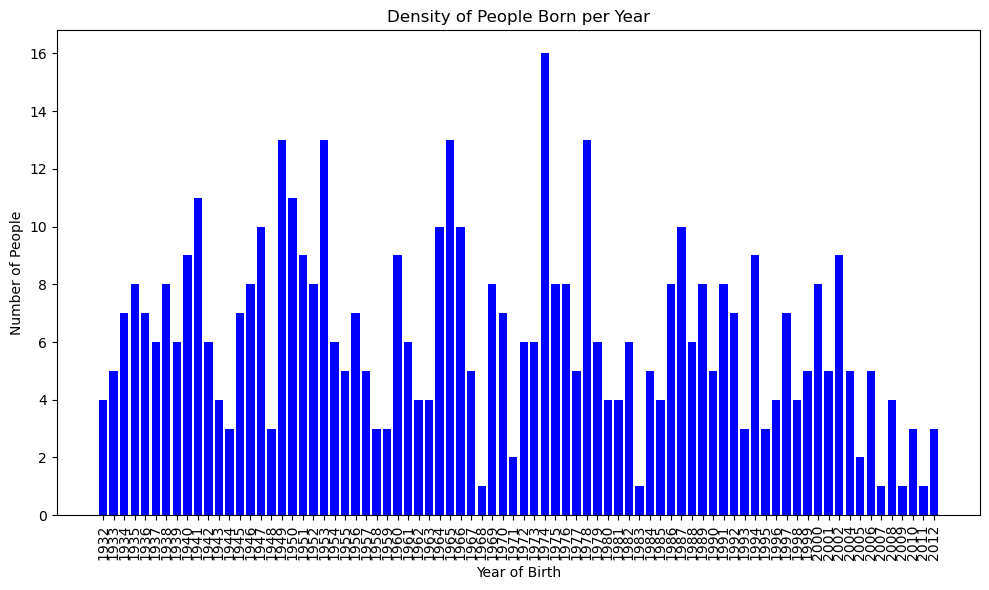

Year of Birth
1932    4
1933    5
1934    7
1935    8
1936    7
       ..
2008    4
2009    1
2010    3
2011    1
2012    3
Name: count, Length: 80, dtype: int64


In [7]:
# number of people born in any year to get idea of frequency for any year
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("laboratory_blood_culture_dataset_deidentified_complex.csv")

# Extract the year from the 'DOM' column (Date of Birth)
data['Year of Birth'] = data['DOM'].apply(lambda x: x.split('/')[-1])

# Count the number of people born per year
yearly_birth_density = data['Year of Birth'].value_counts().sort_index()

# Plot the birth density per year
plt.figure(figsize=(10, 6))
plt.bar(yearly_birth_density.index, yearly_birth_density.values, color='blue')
plt.title('Density of People Born per Year')
plt.xlabel('Year of Birth')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Display the count per year for reference
print(yearly_birth_density)


In [4]:
import pandas as pd
import random
from datetime import datetime

# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to randomize day and month, but keep the year the same with added complexity
def randomize_day_month_complex(date_str):
    try:
        # Parse the date string (assuming DD/MM/YYYY format)
        day, month, year = date_str.split('/')
        year = int(year)
        
        # Step 1: Randomly choose a month (1 to 12)
        random_month = random.randint(1, 12)

        # Step 2: Choose the random day based on the month
        if random_month in [1, 3, 5, 7, 8, 10, 12]:
            # Months with 31 days
            random_day = random.randint(1, 31)
        elif random_month == 2:
            # February: Check if it's a leap year
            if is_leap_year(year):
                random_day = random.randint(1, 29)
            else:
                random_day = random.randint(1, 28)
        else:
            # Months with 30 days
            random_day = random.randint(1, 30)

        # Return the new randomized date in DD/MM/YYYY format
        return f"{str(random_day).zfill(2)}/{str(random_month).zfill(2)}/{year}"
    
    except Exception as e:
        print(f"Error processing date: {date_str} - {e}")
        return date_str  # Return the original date if there's an error

# Mapping regions to NHS regions
region_to_nhs_region = {
    'Bristol': 'South West',
    'East Midlands': 'Midlands',
    'East of England': 'East of England',
    'Kent': 'South East',
    'Leeds': 'North East and Yorkshire',
    'Liverpool': 'North West',
    'London': 'London',
    'Midlands': 'Midlands',
    'North East': 'North East and Yorkshire',
    'North Wales': 'Wales',
    'North West': 'North West',
    'Northern Ireland': 'Northern Ireland',
    'Scotland': 'Scotland',
    'South East': 'South East',
    'South Wales': 'Wales',
    'South West': 'South West',
    'Surrey': 'South East',
    'Wales': 'Wales',
    'West Midlands': 'Midlands',
    'Yorkshire and Humber': 'North East and Yorkshire'
}

# Load your dataset (replace 'file_path' with your file location)
data = pd.read_csv("laboratory_blood_culture_dataset_unclean.csv")

# Apply the randomization function to the 'DOM' column (Date of Birth)
if 'DOM' in data.columns:
    data['DOM'] = data['DOM'].apply(randomize_day_month_complex)
else:
    print("Error: 'DOM' column not found in dataset")

# Map the 'Region' column to NHS regions
if 'Region' in data.columns:
    data['NHS Region'] = data['Region'].map(region_to_nhs_region)
else:
    print("Error: 'Region' column not found in dataset")

# Save the modified dataset to a new CSV
output_path = 'laboratory_blood_culture_dataset_deidentified_with_nhs_regions.csv'
data.to_csv(output_path, index=False)

# Load and display the first row of the modified dataset for verification
dd = pd.read_csv(output_path)
print(dd.head())


  Order Number   Stay ID      UMRN         DOM  Age at Colln  Collection Time  \
0   O513653999  66448162  U1679215  24/09/1975     46.967830  11/4/2022 14:31   
1   O606959381  85136920  U2689485  22/06/1936     85.941136  18/5/2022 10:39   
2   O253002188  82878878  U8515682  21/01/1965     56.960986   5/2/2022 10:31   
3   O611671263  19272465  U2507002  14/05/1933     88.939083  21/9/2022 15:55   
4   O757970849  25481980  U9161179  30/08/1988     33.976728   17/8/2022 1:25   

        Order Time    Received Time Interim Report Time  \
0  11/4/2022 13:16  11/4/2022 15:12     11/4/2022 19:12   
1   18/5/2022 9:34  18/5/2022 11:09     18/5/2022 16:09   
2   5/2/2022 10:11   5/2/2022 11:01      5/2/2022 16:01   
3  21/9/2022 14:09  21/9/2022 16:13     21/9/2022 18:13   
4  16/8/2022 23:55   17/8/2022 1:56      17/8/2022 3:56   

  Preliminary Report Time  ... BC scale Clinic Location         Region  \
0         11/4/2022 22:12  ...       BC   West Midlands  West Midlands   
1         

In [18]:
import pandas as pd
import random
from datetime import datetime

# Function to check if a year is a leap year
def is_leap_year(year):
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# Function to randomize day and month, but keep the year the same with added complexity
def randomize_day_month_complex(date_str):
    try:
        # Parse the date string (assuming DD/MM/YYYY format)
        day, month, year = date_str.split('/')
        year = int(year)
        
        # Step 1: Randomly choose a month (1 to 12)
        random_month = random.randint(1, 12)

        # Step 2: Choose the random day based on the month
        if random_month in [1, 3, 5, 7, 8, 10, 12]:
            # Months with 31 days
            random_day = random.randint(1, 31)
        elif random_month == 2:
            # February: Check if it's a leap year
            if is_leap_year(year):
                random_day = random.randint(1, 29)
            else:
                random_day = random.randint(1, 28)
        else:
            # Months with 30 days
            random_day = random.randint(1, 30)

        # Return the new randomized date in DD/MM/YYYY format
        return f"{str(random_day).zfill(2)}/{str(random_month).zfill(2)}/{year}"
    
    except Exception as e:
        print(f"Error processing date: {date_str} - {e}")
        return date_str  # Return the original date if there's an error

# based on "https://www.england.nhs.uk/system-and-organisational-oversight/system-directory/"
# Mapping regions to NHS regions
region_to_nhs_region = {
    'Bristol': 'South West',
    'East Midlands': 'Midlands',
    'East of England': 'East of England',
    'Kent': 'South East',
    'Leeds': 'North East and Yorkshire',
    'Liverpool': 'North West',
    'London': 'London',
    'Midlands': 'Midlands',
    'North East': 'North East and Yorkshire',
    'North Wales': 'Wales',
    'North West': 'North West',
    'Northern Ireland': 'Northern Ireland',
    'Scotland': 'Scotland',
    'South East': 'South East',
    'South Wales': 'Wales',
    'South West': 'South West',
    'Surrey': 'South East',
    'Wales': 'Wales',
    'West Midlands': 'Midlands',
    'Yorkshire and Humber': 'North East and Yorkshire'
}

# Load your dataset (replace 'file_path' with your file location)
data = pd.read_csv("laboratory_blood_culture_dataset_unclean.csv")

# Apply the randomization function to the 'DOM' column (Date of Birth)
if 'DOM' in data.columns:
    data['DOM'] = data['DOM'].apply(randomize_day_month_complex)
else:
    print("Error: 'DOM' column not found in dataset")

# Map the 'Region' and 'Clinic Location' columns to NHS regions
if 'Region' in data.columns:
    data['Region'] = data['Region'].map(region_to_nhs_region)
    data['Clinic Location'] = data['Region']  # Replace 'Clinic Location' with the mapped 'Region' values
else:
    print("Error: 'Region' column not found in dataset")

# Save the modified dataset to a new CSV
output_path = 'C:/Users/Harshit Gadhiya/OneDrive/Desktop/Project/laboratory_blood_culture_dataset_deidentified_with_nhs_regions_and_clinic_location.csv'
data.to_csv(output_path, index=False)

# Load and display the first row of the modified dataset for verification
dd = pd.read_csv(output_path)
print(dd.head())


  Order Number   Stay ID      UMRN         DOM  Age at Colln  Collection Time  \
0   O513653999  66448162  U1679215  02/08/1975     46.967830  11/4/2022 14:31   
1   O606959381  85136920  U2689485  14/06/1936     85.941136  18/5/2022 10:39   
2   O253002188  82878878  U8515682  07/03/1965     56.960986   5/2/2022 10:31   
3   O611671263  19272465  U2507002  26/04/1933     88.939083  21/9/2022 15:55   
4   O757970849  25481980  U9161179  28/11/1988     33.976728   17/8/2022 1:25   

        Order Time    Received Time Interim Report Time  \
0  11/4/2022 13:16  11/4/2022 15:12     11/4/2022 19:12   
1   18/5/2022 9:34  18/5/2022 11:09     18/5/2022 16:09   
2   5/2/2022 10:11   5/2/2022 11:01      5/2/2022 16:01   
3  21/9/2022 14:09  21/9/2022 16:13     21/9/2022 18:13   
4  16/8/2022 23:55   17/8/2022 1:56      17/8/2022 3:56   

  Preliminary Report Time  ... Performing Lab BC scale  \
0         11/4/2022 22:12  ...            MIB       BC   
1         18/5/2022 18:09  ...            

In [6]:
dd = pd.read_csv("laboratory_blood_culture_dataset_deidentified_with_nhs_regions_and_clinic_location.csv")
dd


,Order Number,Stay ID,UMRN,DOM,Age at Colln,Collection Time,Order Time,Received Time,Interim Report Time,Preliminary Report Time,...,Performing Lab,BC scale,Clinic Location,Region,MET y/n,Clinic Name,ED source,Lab at source,Isolated Organisms,RESULT
0,O513653999,66448162,U1679215,22/08/1975,46.967830,11/4/2022 14:31,11/4/2022 13:16,11/4/2022 15:12,11/4/2022 19:12,11/4/2022 22:12,...,MIB,BC,Midlands,Midlands,Y,West Midlands Oncology,Oncology,Bcref,NaN,Negative
1,O606959381,85136920,U2689485,06/06/1936,85.941136,18/5/2022 10:39,18/5/2022 9:34,18/5/2022 11:09,18/5/2022 16:09,18/5/2022 18:09,...,ICH,BC,London,London,N,London Oncology,Oncology,Bcref,Gram-negative-bacillus & Staphylococcus epider...,Positive
2,O253002188,82878878,U8515682,08/01/1965,56.960986,5/2/2022 10:31,5/2/2022 10:11,5/2/2022 11:01,5/2/2022 16:01,5/2/2022 20:01,...,JI,BC,North East and Yorkshire,North East and Yorkshire,N,North East Oncology,Oncology,CC,a possible Staphylococcus complex & Gram-posit...,Positive
3,O611671263,19272465,U2507002,06/07/1933,88.939083,21/9/2022 15:55,21/9/2022 14:09,21/9/2022 16:13,21/9/2022 18:13,21/9/2022 19:13,...,MIB,BC,Wales,Wales,N,NWH Oncology,Oncology,BCL,NaN,Negative
4,O757970849,25481980,U9161179,29/02/1988,33.976728,17/8/2022 1:25,16/8/2022 23:55,17/8/2022 1:56,17/8/2022 3:56,17/8/2022 5:56,...,ICH,BC,Midlands,Midlands,Y,Midlands ED,ED,NaN,Staphylococcus hominis complex,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,O225005044,81722722,U2039371,26/05/1959,62.956879,19/1/2022 17:44,19/1/2022 16:21,19/1/2022 18:41,19/1/2022 19:41,19/1/2022 23:41,...,GOSH,BC,Wales,Wales,N,North Wales ED,ED,NaN,Staphylococcus-haemolyticus & Gordonia species...,Positive
496,O474728214,93116344,U9201866,10/02/1994,27.980835,11/6/2022 3:16,11/6/2022 2:43,11/6/2022 4:01,11/6/2022 9:01,11/6/2022 10:01,...,UKB,BC,Wales,Wales,Y,North Wales Oncology,Oncology,BCL,NaN,Negative
497,O538180655,61657688,U6771803,26/09/1994,27.980835,25/11/2022 3:57,25/11/2022 3:08,25/11/2022 4:07,25/11/2022 6:07,25/11/2022 9:07,...,CBC,BC,London,London,Y,London ED,ED,Tran,NaN,Negative
498,O985077019,82943147,U8368613,07/08/1976,45.968515,6/9/2022 12:15,6/9/2022 11:46,6/9/2022 12:32,6/9/2022 13:32,6/9/2022 18:32,...,LSHTM,BC,South West,South West,Y,South Oncology,Oncology,SX,Acinetobacter baumannii/calcoaceticus complex ...,Positive


In [23]:
import pandas as pd
import random

# Load your dataset (replace with the actual dataset file path)
data = pd.read_csv('C:/Users/Harshit Gadhiya/OneDrive/Desktop/Project/laboratory_blood_culture_dataset_deidentified_with_nhs_regions_and_clinic_location.csv')

# Ensure 'Region', 'Clinic ID', and 'Clinic Name' columns exist
if 'Region' in data.columns and 'Clinic ID' in data.columns and 'Clinic Name' in data.columns:

    # Step 1: Function to rename clinic IDs and names based on region
    def rename_clinic_ids_and_names(df):
        # Get unique clinic IDs within the region
        unique_clinics = df['Clinic ID'].unique()
        
        # Create random clinic numbers (shuffle the order of the new names)
        randomized_indices = list(range(1, len(unique_clinics) + 1))
        random.shuffle(randomized_indices)
        
        # Create a mapping of old clinic IDs to new randomized names
        clinic_mapping = {clinic_id: f"{df['Region'].iloc[0]} Clinic {randomized_indices[i]}" for i, clinic_id in enumerate(unique_clinics)}
        
        # Replace the clinic IDs and names with new random names based on this mapping
        df['Clinic ID'] = df['Clinic ID'].map(clinic_mapping)
        df['Clinic Name'] = df['Clinic ID']  # Make Clinic Name the same as Clinic ID
        
        return df

    # Step 2: Apply the renaming function grouped by 'Region'
    data = data.groupby('Region', group_keys=False).apply(rename_clinic_ids_and_names)

    # Step 3: Save the modified dataset to a new CSV file
    output_path = 'C:/Users/Harshit Gadhiya/OneDrive/Desktop/Project/laboratory_blood_culture_dataset_clinic_ids_names_renamed_random.csv'
    data.to_csv(output_path, index=False)

    # Step 4: Display the first few rows of the modified dataset for verification
    print(data[['Region', 'Clinic ID', 'Clinic Name']].head(20))

else:
    print("Error: 'Region', 'Clinic ID', or 'Clinic Name' column not found in the dataset.")


                      Region                           Clinic ID  \
0                   Midlands                  Midlands Clinic 23   
1                     London                    London Clinic 18   
2   North East and Yorkshire  North East and Yorkshire Clinic 24   
3                      Wales                      Wales Clinic 1   
4                   Midlands                   Midlands Clinic 3   
5                 South West                 South West Clinic 7   
6                 South West                South West Clinic 11   
7                     London                     London Clinic 6   
8                 North West                North West Clinic 53   
9   North East and Yorkshire  North East and Yorkshire Clinic 52   
10                  Midlands                  Midlands Clinic 38   
11                South West                South West Clinic 40   
12                South East                 South East Clinic 4   
13                North West                Nort

C:\Users\Harshit Gadhiya\AppData\Local\Temp\ipykernel_29284\3762058744.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Region', group_keys=False).apply(rename_clinic_ids_and_names)
